********************************************************************************************************************************
# LAB 08 - Clustering
<hr/>

By: **Virendra Singh** <br>
Linkedin: https://www.linkedin.com/in/singhviren7/

<hr/>


## Lab Overview  
### Objectives

- Illustrate KMeans and Agglomerative Hierarchical Clustering on Iris Dataset, considering only two features - Sepal Length and Petal Width.
- Use Elbow Method as a way to find optimum number of clusters.

### Problem Definition
- We have to cluster the features and get lavels. 
- Data analysis EDA to be done with various visulization and dealing with odd features.
- Preapering the final labels and compairing different parameters.

### Approach
`Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.`
- First load the data and explore it's various features and parameters.
- In EDA part using visulization various plota are drawn and different inshights are gathered.
- Preaper the data for clustgering. Using Different cluster methods find the labels.
- Compare different values and explote the parameters of Descision Trees.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#metrics
from sklearn.metrics import accuracy_score 

import warnings
warnings.filterwarnings('ignore')

## Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

##  Importing the dataset:

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Data
iris = load_iris()

# Create a dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = iris.target
X = iris.data
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
33,5.5,4.2,1.4,0.2,0
45,4.8,3.0,1.4,0.3,0
73,6.1,2.8,4.7,1.2,1
79,5.7,2.6,3.5,1.0,1
5,5.4,3.9,1.7,0.4,0


In [3]:
### Checking the length & dimensions of our dataframe, we can use len() method & “.shape”.
print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

Dataset Lenght::  150
Dataset Shape::  (150, 5)


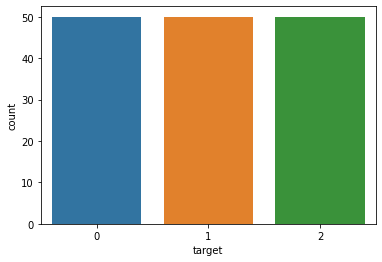

In [4]:
sns.countplot(data['target'])
plt.show()

Each targets are having same number of counts i.e 50.

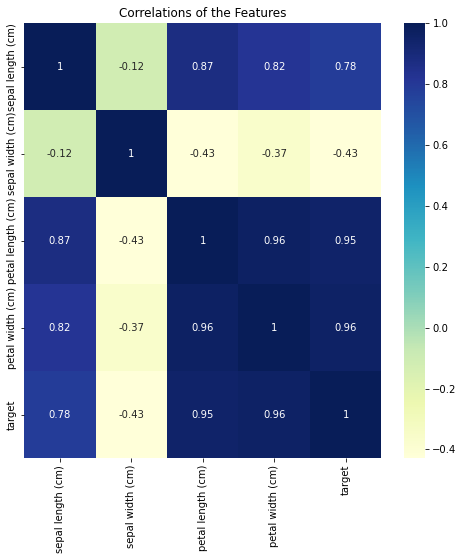

In [5]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

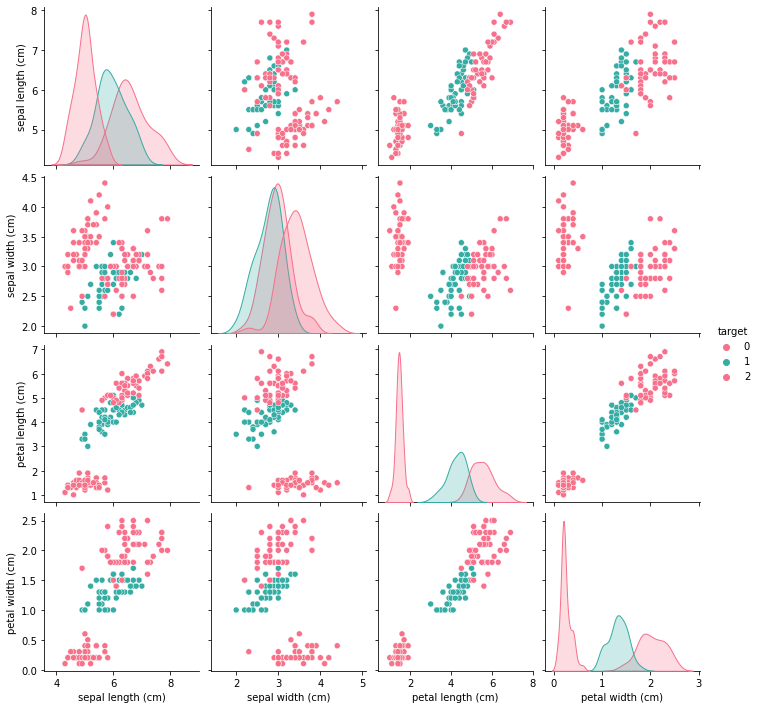

In [6]:
i = sns.pairplot(data,hue='target', palette='husl')
plt.show()

<hr/>

`Since we are going to study about only two features of dataset, we are segracting both reguired features:`

In [7]:
df=data[["sepal length (cm)","petal width (cm)"]]

In [8]:
df.head()

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


##  Agglomerative Hierarchical Clustering on Iris Dataset:

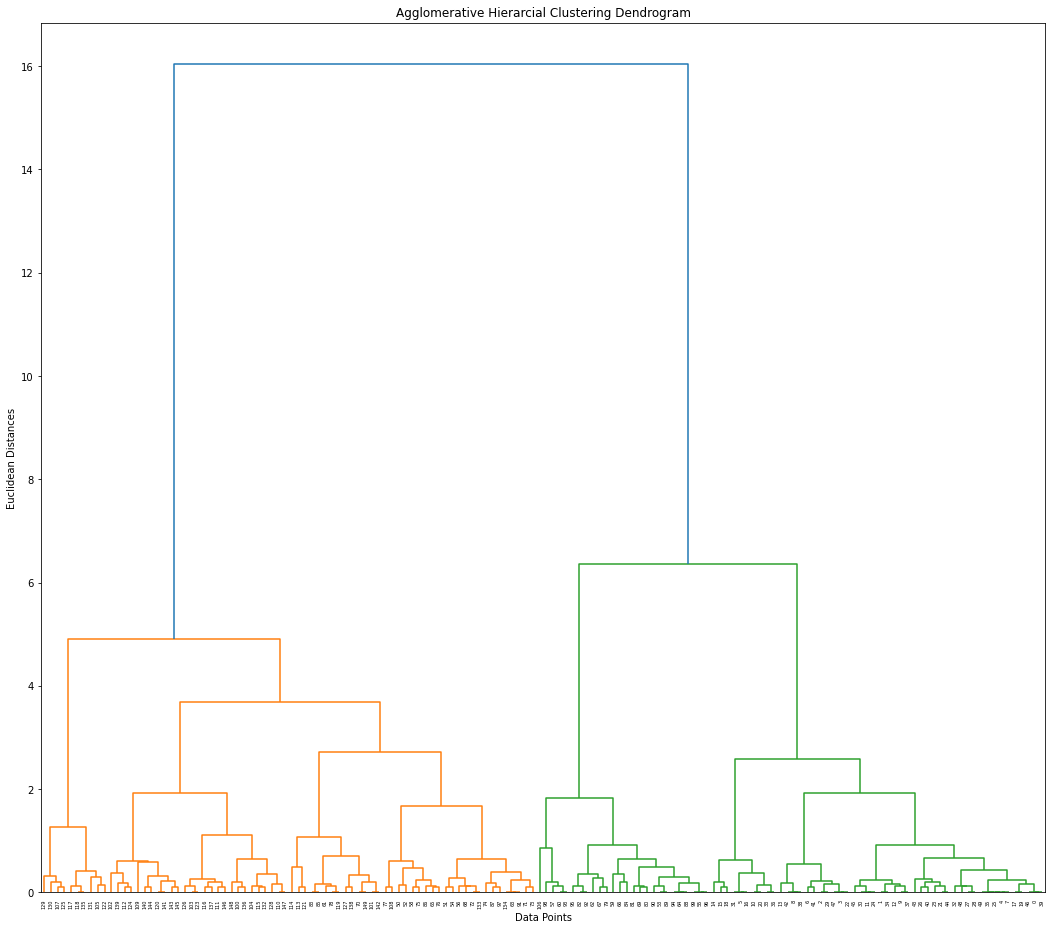

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[18,16])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Agglomerative Hierarcial Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

The plot is majorly indecating to go for the 2 clusters and there is also a fair enough chance to go for the 3 clusuering .

In [10]:
# Clustering for n_clusters=3, linkage-"ward".
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

In [11]:
## creating a new dataframe only for labels and converting it into categorical variable
df_h = df.copy(deep=True)
df_h['labels_h'] = cluster2

In [12]:
df_h.head()

,sepal length (cm),petal width (cm),labels_h
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


In [13]:
# new labels:
df_h.labels_h.value_counts()

0    74
1    50
2    26
Name: labels_h, dtype: int64

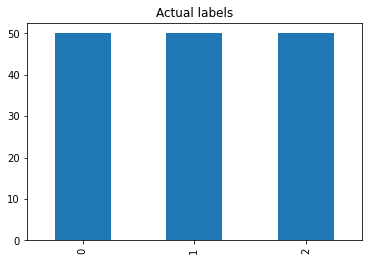

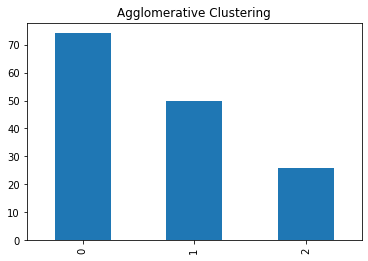

In [14]:
plt.title("Actual labels")
data.target.value_counts().plot(kind='bar')
plt.show()
plt.title("Agglomerative Clustering")
df_h.labels_h.value_counts().plot(kind='bar')
plt.show()

<hr>

## kmeans Clustering:

In [15]:
model = KMeans(n_clusters = 3)

<IPython.core.display.Javascript object>

In [16]:
model

KMeans(n_clusters=3)

In [17]:
# Centroids
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,num_clusters,cluster_errors
0,1,188.738267
1,2,59.914117
2,3,32.737460
3,4,24.692315
4,5,19.708226
5,6,16.304289
6,7,12.792641
7,8,11.076335
8,9,9.587884
9,10,8.344746


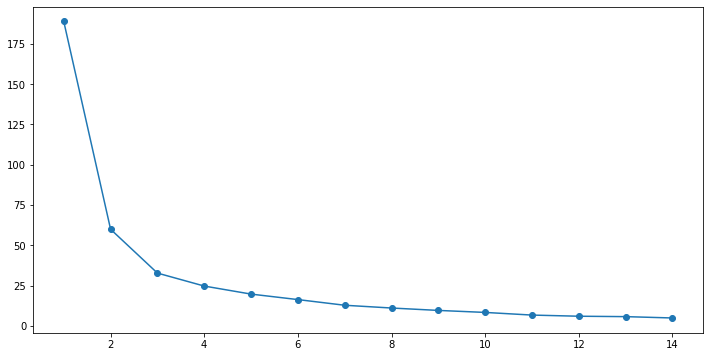

In [18]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

Considering the elbo plot we are going to create with 3 clusters: n_clusters=3

In [19]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

<IPython.core.display.Javascript object>

In [20]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [21]:
centroids = kmeans.cluster_centers_
centroids

array([[6.84318182, 1.98409091],
       [5.00555556, 0.3037037 ],
       [5.86730769, 1.46538462]])

In [22]:
centroid_df = pd.DataFrame(centroids, columns = list(df))

In [23]:
centroid_df

,sepal length (cm),petal width (cm)
0,6.843182,1.984091
1,5.005556,0.303704
2,5.867308,1.465385


In [24]:
## creating a new dataframe only for labels and converting it into categorical variable
df_k = pd.DataFrame(kmeans.labels_ , columns = list(['labels_k']))

df_k['labels_k'] = df_k['labels_k'].astype('category')

In [25]:
# Joining the label dataframe with the iris data frame to create df_labeled. Note: it could be appended to original dataframe
df_k = df.join(df_k)

In [26]:
df_k.head()

,sepal length (cm),petal width (cm),labels_k
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1


In [27]:
df_k.labels_k.value_counts()

1    54
2    52
0    44
Name: labels_k, dtype: int64

In [28]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

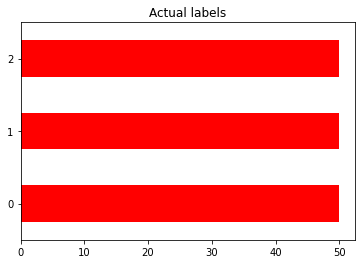

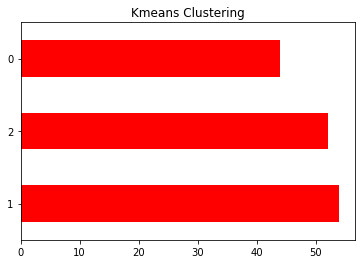

In [29]:
plt.title("Actual labels")
data.target.value_counts().plot(kind='barh', color='red')
plt.show()
plt.title("Kmeans Clustering")
df_k.labels_k.value_counts().plot(kind='barh',color='red')
plt.show()

In [30]:
from mpl_toolkits.mplot3d import Axes3D

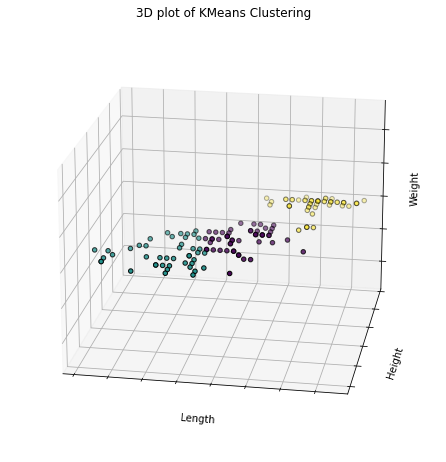

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_k)
labels = kmeans.labels_
ax.scatter(df_k.iloc[:, 0], df_k.iloc[:, 1],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
plt.show()

<hr/>

## Comparing both clusters:

ScATTER PLOT OF LABELS IN ALL 3 METHODS:

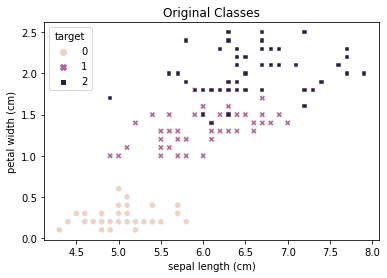

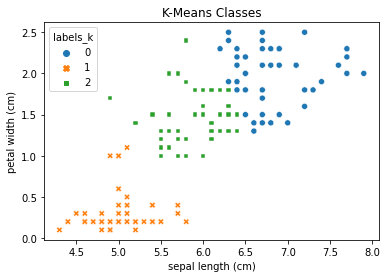

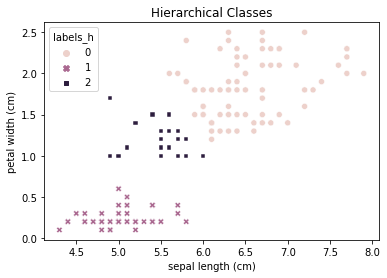

In [32]:
plt.title('Original Classes')
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", hue='labels_k', style='labels_k', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", hue='labels_h', style='labels_h', data=df_h)
plt.show()

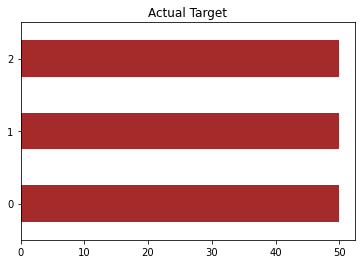

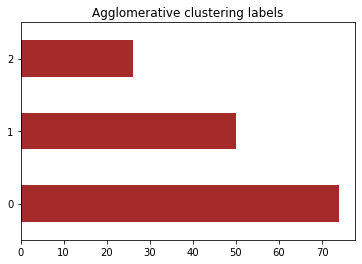

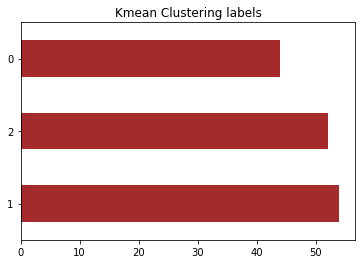

In [33]:
plt.title("Actual Target")
data.target.value_counts().plot(kind='barh', color='brown')
plt.show()
plt.title("Agglomerative clustering labels")
df_h.labels_h.value_counts().plot(kind='barh',color='brown')
plt.show()
plt.title("Kmean Clustering labels")
df_k.labels_k.value_counts().plot(kind='barh',color='brown')
plt.show()

In [34]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.labels_k.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.labels_h.value_counts())

Original Data Classes:
0    50
1    50
2    50
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    54
2    52
0    44
Name: labels_k, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    74
1    50
2    26
Name: labels_h, dtype: int64


<hr/>

## References:
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
- https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
- https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

## Conclusion/Results:
This assignment given us the clear idea about the DataFrame, Visulization, ML/Analysis, libraries, datasets and various subparts of sklearn libraries, it's uses and various method to find out the hidden patterns in data and relationa between various features and data stractures. We explored the different methods of clustering and then assigning the labels.
*******************************************************************************************************************************